# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

from IPython.display import display

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

def savefig(name, pad=0.1,):
    path = os.path.join('images', name + '.png')
    plt.savefig(path, bbox_inches='tight', pad_inches=pad)

# Import Datasets

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [83]:
train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')
truth_df = pd.read_csv('data/truth_data.csv')

## Train

In [4]:
print('Number of rows: {} \nNumber of features: {}'.format(*train_df.shape))
display(train_df.head())

Number of rows: 20631 
Number of features: 26


id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5   ...        s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62   ...     521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62   ...     522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62   ...     522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62   ...     522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62   ...     522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

## Test

In [5]:
print('Number of rows: {} \nNumber of features: {}'.format(*test_df.shape))
display(test_df.head())

Number of rows: 13096 
Number of features: 26


id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5   ...        s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62   ...     521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62   ...     522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62   ...     521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62   ...     521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62   ...     522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08  23.4166  
3  39.00  23.3737  
4  38.99  23.4130  

[5 rows x 26 columns]

## Truth

In [6]:
print('Number of rows: {} \nNumber of features: {}'.format(*truth_df.shape))
display(truth_df.head())

Number of rows: 100 
Number of features: 1


extra_cycles
0           112
1            98
2            69
3            82
4            91

### Feature Helpers

In [6]:
id_cols = ['id', 'cycle']
setting_cols = ['setting1', 'setting2', 'setting3']
sensor_columns_all = ['s{}'.format(i) for i in range(1, 22)]

### Training Set Statistics

In [75]:
train_df[sensor_columns + settings_columns].agg(['min', 'max', 'mean', 'median', 'std','skew', 'kurtosis']).transpose()

min        max         mean     median           std  \
s1         518.6700   518.6700   518.670000   518.6700  6.537152e-11   
s2         641.2100   644.5300   642.680934   642.6400  5.000533e-01   
s3        1571.0400  1616.9100  1590.523119  1590.1000  6.131150e+00   
s4        1382.2500  1441.4900  1408.933782  1408.0400  9.000605e+00   
s5          14.6200    14.6200    14.620000    14.6200  3.394700e-12   
s6          21.6000    21.6100    21.609803    21.6100  1.388985e-03   
s7         549.8500   556.0600   553.367711   553.4400  8.850923e-01   
s8        2387.9000  2388.5600  2388.096652  2388.0900  7.098548e-02   
s9        9021.7300  9244.5900  9065.242941  9060.6600  2.208288e+01   
s10          1.3000     1.3000     1.300000     1.3000  4.660829e-13   
s11         46.8500    48.5300    47.541168    47.5100  2.670874e-01   
s12        518.6900   523.3800   521.413470   521.4800  7.375534e-01   
s13       2387.8800  2388.5600  2388.096152  2388.0900  7.191892e-02   
s14       8099.9400  8293.7200  8143.752722  8140.5400  1.907618e+01   
s15          8.3249     8.5848     8.442146     8.4389  3.750504e-02   
s16          0.0300     0.0300     0.030000     0.0300  1.556432e-14   
s17        388.0000   400.0000   393.210654   393.0000  1.548763e+00   
s18       2388.0000  2388.0000  2388.000000  2388.0000  0.000000e+00   
s19        100.0000   100.0000   100.000000   100.0000  0.000000e+00   
s20         38.1400    39.4300    38.816271    38.8300  1.807464e-01   
s21         22.8942    23.6184    23.289705    23.2979  1.082509e-01   
setting1    -0.0087     0.0087    -0.000009    -0.0000  2.187313e-03   
setting2    -0.0006     0.0006     0.000002     0.0000  2.930621e-04   
setting3   100.0000   100.0000   100.000000   100.0000  0.000000e+00   

              skew   kurtosis  
s1        0.000000   0.000000  
s2        0.316526  -0.112043  
s3        0.308946   0.007762  
s4        0.443194  -0.163681  
s5        0.000000   0.000000  
s6       -6.916813  45.846746  
s7       -0.394329  -0.157949  
s8        0.479411   0.333149  
s9        2.555365   9.378681  
s10       0.000000   0.000000  
s11       0.469329  -0.172192  
s12      -0.442407  -0.144917  
s13       0.469792   0.387244  
s14       2.372554   8.854664  
s15       0.388259  -0.121430  
s16       0.000000   0.000000  
s17       0.353126  -0.039174  
s18       0.000000   0.000000  
s19       0.000000   0.000000  
s20      -0.358445  -0.112829  
s21      -0.350375  -0.117039  
setting1 -0.024766  -0.009132  
setting2  0.009085  -1.130447  
setting3  0.000000   0.000000

### Sensor Value Plot for Engine Unit 1

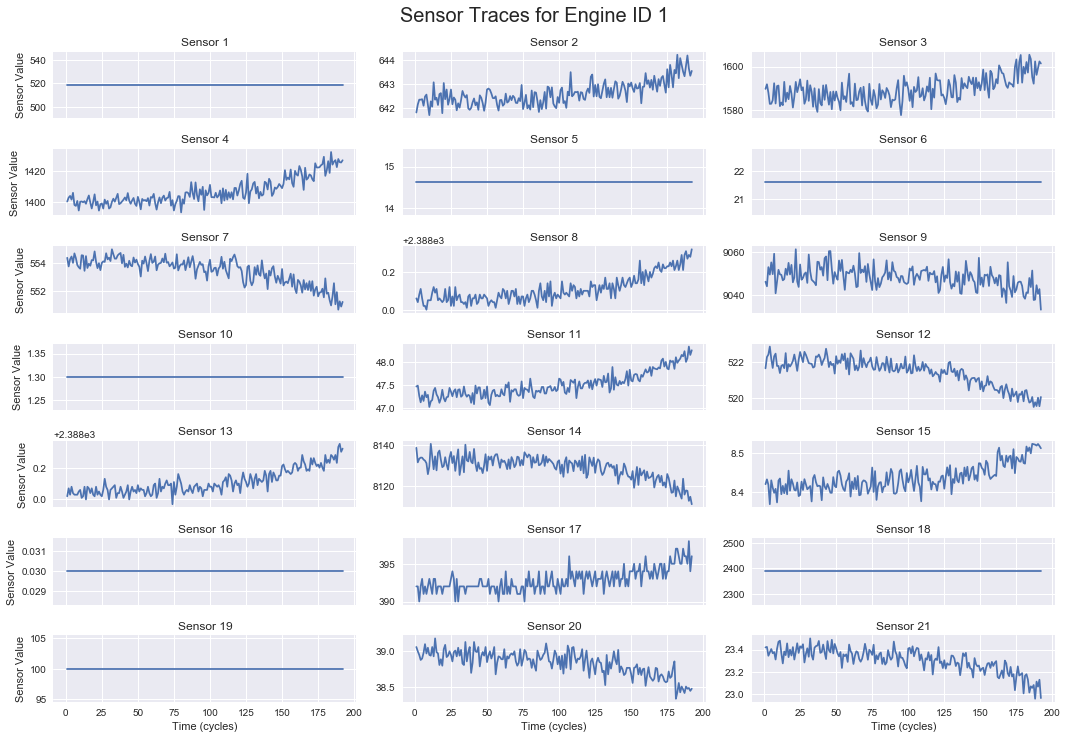

In [8]:
fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
for index, ax in enumerate(axes.ravel()):
    train_df[train_df.id==1].plot(x='cycle', y=sensor_columns[index], ax=ax, legend=False)
    if index % 3 == 0: ax.set_ylabel("Sensor Value")
    ax.set_xlabel("Time (cycles)")
    ax.set_title("Sensor {}".format(index+1))

fig.tight_layout()
fig.suptitle("Sensor Traces for Engine ID 1", size=20, y=1.025)
plt.show()

### Sensor Plot for Multiple Engine Units

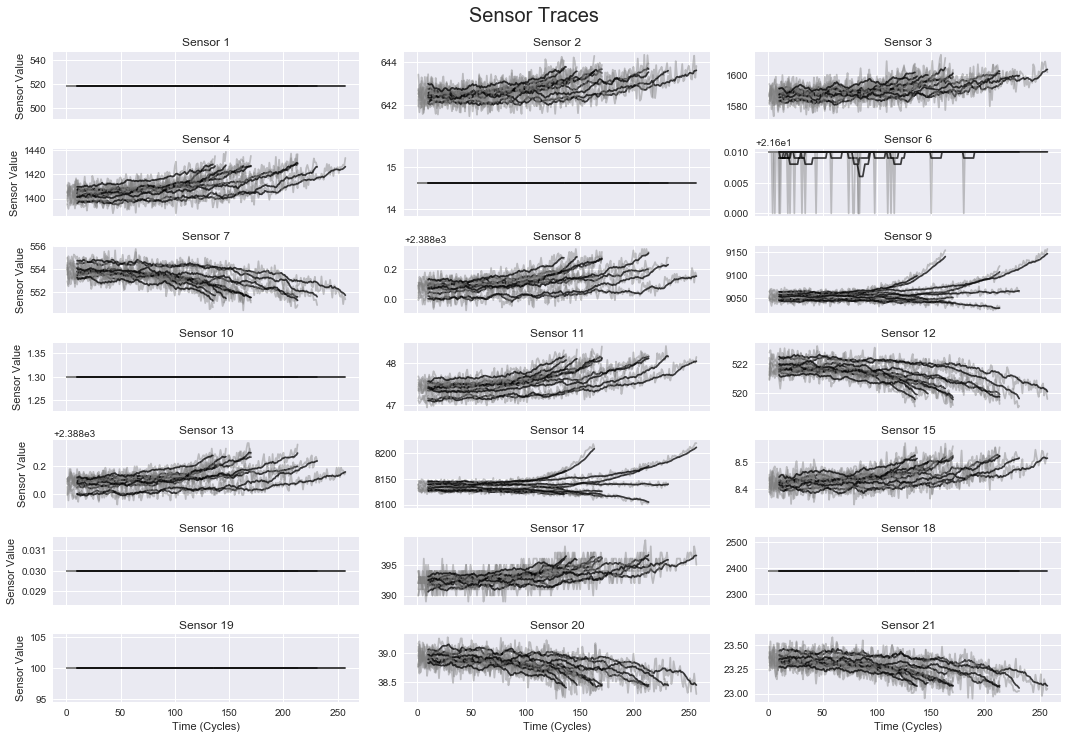

In [9]:
ids = train_df['id'].unique()
units_to_plot = np.random.choice(ids, size=10, replace=False)
plot_data = train_df[train_df.id.isin(units_to_plot)]
fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)

for index, ax in enumerate(axes.ravel()):
    for unit_id, group in plot_data.groupby('id'):
        group.plot(x='cycle', y=sensor_columns[index], alpha=0.45, ax=ax, color='gray', legend=False)
        group.rolling(window=10, on='cycle').mean().plot(x='cycle', y=sensor_columns[index], alpha=.75, ax=ax,
                                                             color='black', legend=False)
    if index % 3 == 0: ax.set_ylabel("Sensor Value")
    ax.set_xlabel("Time (Cycles)")
    ax.set_title("Sensor {}".format(index+1))

fig.suptitle("Sensor Traces", size=20, y=1.025)
fig.tight_layout()

# Create Labels

In [3]:
target_cols = ['RUL', 'RUL_norm', 'label1', 'label2']

In [84]:
w1 = 30
w0 = 15

# Label 2
def calc_label2(rul):
    if rul >= w1: 
        return 0
    elif rul < w1 and rul > w0: 
        return 1
    else: 
        return 2
    
# Get max lifetime for each engine unit
engine_lifetimes_train = train_df.groupby('id')['cycle'].max()

def make_rul_label_train(row):
    '''
    Takes a row and returns the RUL label for that row
    '''
    
    lifetime = engine_lifetimes_train[row.id]
    rul = lifetime - row.cycle
    
    return rul.astype(int)

# Apply to all rows to create the rul label
train_df['RUL'] = train_df.apply(make_rul_label_train, axis=1)

# Label 1
train_df['label1'] = np.where(train_df.RUL < w1, 1, 0)

# Label 2
train_df['label2'] = train_df.RUL.apply(calc_label2)

# Get the extra cycles from the ground truth dataset
extra_cycles = truth_df.extra_cycles.values

# Add the extra cycles to the max remaining lifetime in the test set
engine_lifetimes_test = test_df.groupby('id')['cycle'].max() + extra_cycles

def make_rul_label_test(row):
    '''
    Takes a row and returns the RUL label for that row
    '''
    
    lifetime = engine_lifetimes_test[row.id]
    rul = lifetime - row.cycle
    
    return rul.astype(int)

# Apply to all rows to create the rul label
test_df['RUL'] = test_df.apply(make_rul_label_test, axis=1)

# Label 1
test_df['label1'] = np.where(test_df.RUL < w1, 1, 0)

# Label 2
test_df['label2'] = test_df.RUL.apply(calc_label2)

display(train_df.head())
display(test_df.head())

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5   ...       s15   s16  s17   s18    s19    s20      s21  RUL  label1  \
0  14.62   ...    8.4195  0.03  392  2388  100.0  39.06  23.4190  191       0   
1  14.62   ...    8.4318  0.03  392  2388  100.0  39.00  23.4236  190       0   
2  14.62   ...    8.4178  0.03  390  2388  100.0  38.95  23.3442  189       0   
3  14.62   ...    8.3682  0.03  392  2388  100.0  38.88  23.3739  188       0   
4  14.62   ...    8.4294  0.03  393  2388  100.0  38.90  23.4044  187       0   

   label2  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 29 columns]

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5   ...       s15   s16  s17   s18    s19    s20      s21  RUL  label1  \
0  14.62   ...    8.4052  0.03  392  2388  100.0  38.86  23.3735  142       0   
1  14.62   ...    8.3803  0.03  393  2388  100.0  39.02  23.3916  141       0   
2  14.62   ...    8.4441  0.03  393  2388  100.0  39.08  23.4166  140       0   
3  14.62   ...    8.3917  0.03  391  2388  100.0  39.00  23.3737  139       0   
4  14.62   ...    8.4031  0.03  390  2388  100.0  38.99  23.4130  138       0   

   label2  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 29 columns]

## Label Visuals

### Training Set

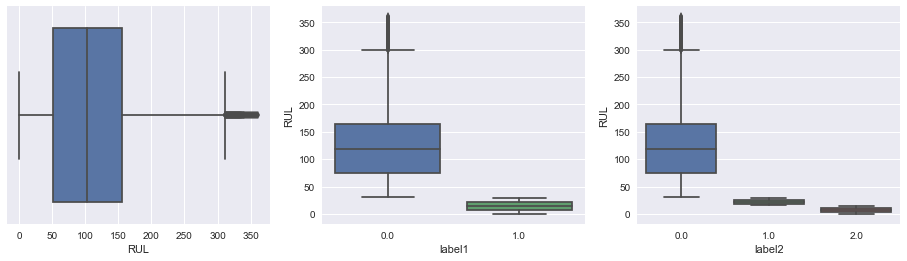

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))

g1 = sns.boxplot(train_df['RUL'], ax=ax1)
g2 = sns.boxplot(x="label1", y='RUL', data=train_df, ax=ax2)
g3 = sns.boxplot(x="label2", y='RUL', data=train_df, ax=ax3)

savefig('labels')

### Test Set

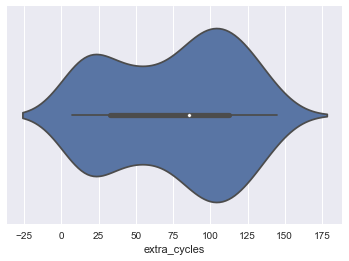

In [123]:
g = sns.violinplot(truth_df.extra_cycles)

# Heatmap

In [237]:
corr = train_df[sensor_columns_var + ['RUL']].corr(method='pearson')
corr.head()

s2        s3        s4        s7        s8        s9       s11  \
s2  1.000000  0.602610  0.714949 -0.702136  0.662325  0.273764  0.740020   
s3  0.602610  1.000000  0.678413 -0.664595  0.602481  0.322964  0.695900   
s4  0.714949  0.678413  1.000000 -0.793130  0.746852  0.297429  0.830136   
s7 -0.702136 -0.664595 -0.793130  1.000000 -0.767132 -0.217835 -0.822805   
s8  0.662325  0.602481  0.746852 -0.767132  1.000000 -0.032091  0.782213   

         s12       s13       s14       s15       s17       s20       s21  \
s2 -0.724578  0.661792  0.179752  0.675975  0.629886 -0.661841 -0.668050   
s3 -0.680307  0.600963  0.237137  0.639921  0.600017 -0.625941 -0.633901   
s4 -0.815591  0.745158  0.190748  0.758459  0.703499 -0.748067 -0.745193   
s7  0.812713 -0.764611 -0.110053 -0.747051 -0.692893  0.736163  0.737447   
s8 -0.786540  0.826084 -0.144787  0.700949  0.627785 -0.687030 -0.688840   

         RUL  
s2 -0.606484  
s3 -0.584520  
s4 -0.678948  
s7  0.657223  
s8 -0.563968

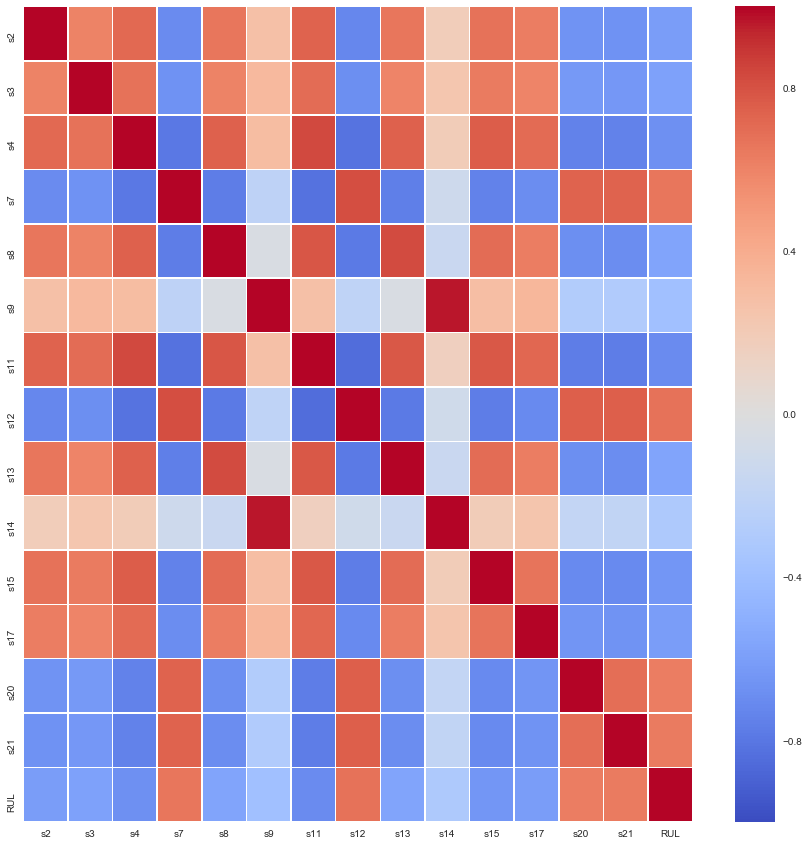

In [239]:
dims = (len(corr), len(corr))
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(corr,linewidths=.5, cmap='coolwarm')
plt.show()

### Sensor Values Plot Against RUL

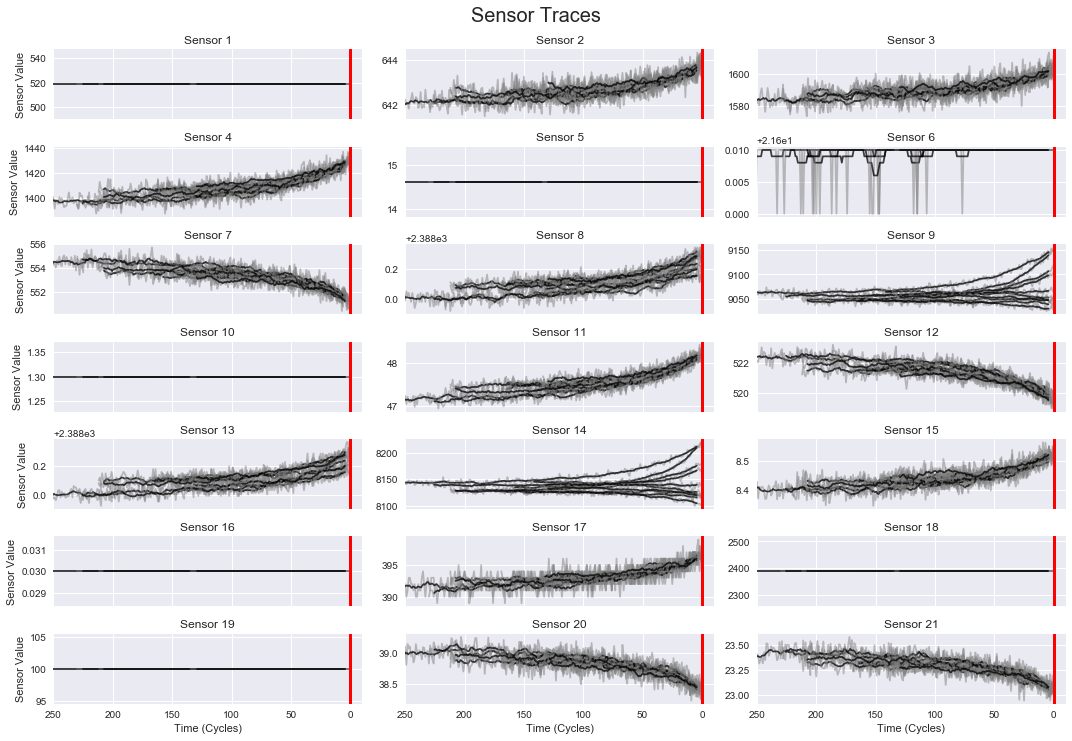

In [66]:
plot_data = train_df[train_df.id.isin(units_to_plot)]
fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)

for index, ax in enumerate(axes.ravel()):
    for unit_id, group in plot_data.groupby('id'):
        group.plot(x='RUL', y=sensor_columns_all[index], alpha=0.5, ax=ax, color='gray', legend=False)
        group.rolling(window=10, on='cycle').mean().plot(x='RUL', y=sensor_columns_all[index], alpha=.75, ax=ax,
                                                             color='black', legend=False)
    if index % 3 == 0: ax.set_ylabel("Sensor Value")
    ax.set_xlabel("Time (Cycles)")
    ax.set_title("Sensor {}".format(index+1))

    ax.axvline(x=0, color='r', linewidth=3)
    ax.set_xlim([250, -10])

fig.suptitle("Sensor Traces", size=20, y=1.025)
fig.tight_layout()

# Remove Constant Sensor Values

In [85]:
sensor_range = pd.DataFrame(train_df[sensor_columns_all].max() - train_df[sensor_columns_all].min(), columns = ['Range'])
sensor_range['Var'] = np.where(sensor_range.Range > 0.01, True, False)
display(sensor_range)
sensor_columns_var = sensor_range[sensor_range.Var == True].index.tolist()
sensor_columns_drop = sensor_range[sensor_range.Var == False].index.tolist()

Range    Var
s1     0.0000  False
s2     3.3200   True
s3    45.8700   True
s4    59.2400   True
s5     0.0000  False
s6     0.0100  False
s7     6.2100   True
s8     0.6600   True
s9   222.8600   True
s10    0.0000  False
s11    1.6800   True
s12    4.6900   True
s13    0.6800   True
s14  193.7800   True
s15    0.2599   True
s16    0.0000  False
s17   12.0000   True
s18    0.0000  False
s19    0.0000  False
s20    1.2900   True
s21    0.7242   True

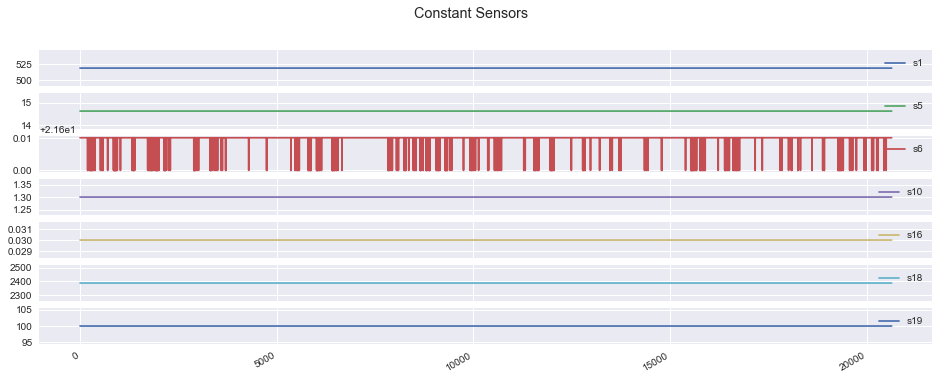

In [66]:
g = train_df[sensor_columns_drop].plot(subplots=True, figsize=(16,6), title='Constant Sensors')
savefig('constsensors')

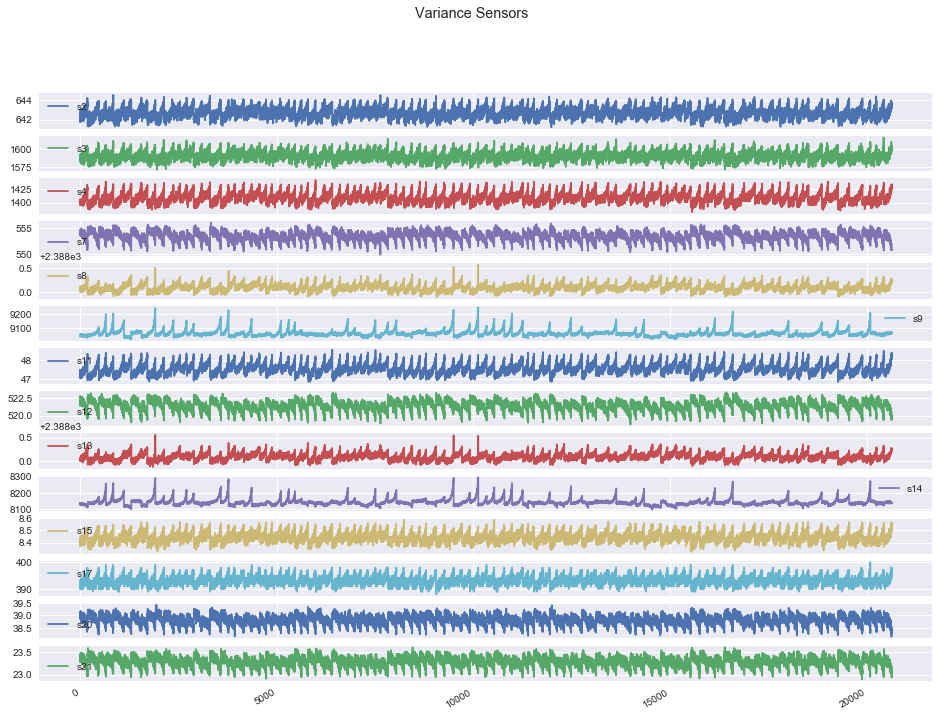

In [67]:
g = train_df[sensor_columns_var].plot(subplots=True, figsize=(16,12), title='Variance Sensors')
savefig('varsensors')

In [86]:
train_df.drop(columns=sensor_columns_drop, axis=1, inplace=True)
test_df.drop(columns=sensor_columns_drop, axis=1, inplace=True)

# Normalise the Datasets with MinMaxScaler

In [41]:
norm_cols = sensor_columns_var + ['RUL_norm']

In [87]:
train_df['RUL_norm'] = train_df['RUL']
train_df = train_df.drop(setting_cols, axis=1)

test_df['RUL_norm'] = test_df['RUL']
test_df.drop(setting_cols, axis=1, inplace=True)

scaler = MinMaxScaler().fit(train_df[norm_cols])
train_df[norm_cols] = scaler.transform(train_df[norm_cols])
test_df[norm_cols] = scaler.transform(test_df[norm_cols])

In [79]:
display(train_df.head())
display(test_df.head())

id  cycle      s1        s2        s3        s4     s5     s6        s7  \
0   1      1  518.67  0.183735  0.406802  0.309757  14.62  21.61  0.726248   
1   1      2  518.67  0.283133  0.453019  0.352633  14.62  21.61  0.628019   
2   1      3  518.67  0.343373  0.369523  0.370527  14.62  21.61  0.710145   
3   1      4  518.67  0.343373  0.256159  0.331195  14.62  21.61  0.740741   
4   1      5  518.67  0.349398  0.257467  0.404625  14.62  21.61  0.668277   

         s8    ...      s16       s17   s18    s19       s20       s21  RUL  \
0  0.242424    ...     0.03  0.333333  2388  100.0  0.713178  0.724662  191   
1  0.212121    ...     0.03  0.333333  2388  100.0  0.666667  0.731014  190   
2  0.272727    ...     0.03  0.166667  2388  100.0  0.627907  0.621375  189   
3  0.318182    ...     0.03  0.333333  2388  100.0  0.573643  0.662386  188   
4  0.242424    ...     0.03  0.416667  2388  100.0  0.589147  0.704502  187   

   label1  label2  RUL_norm  
0       0       0  0.529086  
1       0       0  0.526316  
2       0       0  0.523546  
3       0       0  0.520776  
4       0       0  0.518006  

[5 rows x 27 columns]

id  cycle      s1        s2        s3        s4     s5     s6        s7  \
0   1      1  518.67  0.545181  0.310661  0.269413  14.62  21.61  0.652174   
1   1      2  518.67  0.150602  0.379551  0.222316  14.62  21.61  0.805153   
2   1      3  518.67  0.376506  0.346632  0.322248  14.62  21.61  0.685990   
3   1      4  518.67  0.370482  0.285154  0.408001  14.62  21.61  0.679549   
4   1      5  518.67  0.391566  0.352082  0.332039  14.62  21.61  0.694042   

         s8    ...      s16       s17   s18    s19       s20       s21  RUL  \
0  0.212121    ...     0.03  0.333333  2388  100.0  0.558140  0.661834  142   
1  0.166667    ...     0.03  0.416667  2388  100.0  0.682171  0.686827  141   
2  0.227273    ...     0.03  0.416667  2388  100.0  0.728682  0.721348  140   
3  0.196970    ...     0.03  0.250000  2388  100.0  0.666667  0.662110  139   
4  0.166667    ...     0.03  0.166667  2388  100.0  0.658915  0.716377  138   

   label1  label2  RUL_norm  
0       0       0  0.393352  
1       0       0  0.390582  
2       0       0  0.387812  
3       0       0  0.385042  
4       0       0  0.382271  

[5 rows x 27 columns]

### Normalised Sensor Values Boxplot

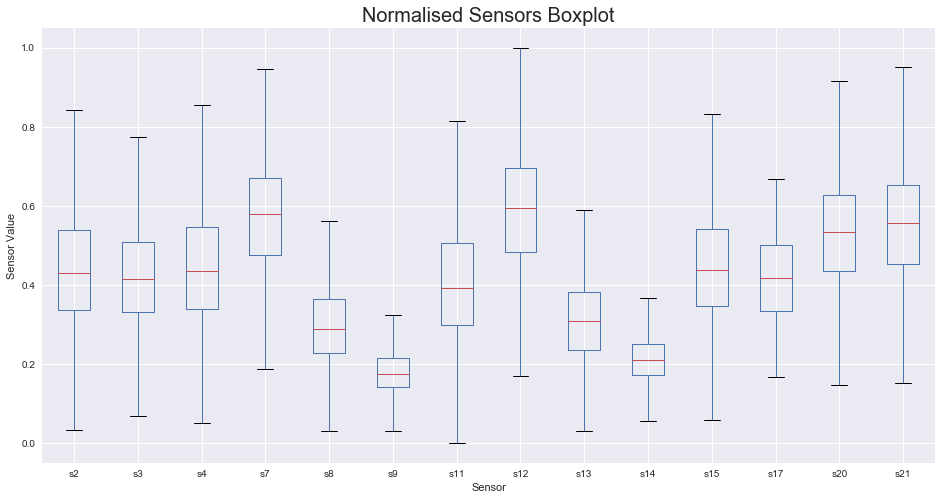

In [11]:
g = train_df[sensor_columns_var].boxplot(figsize=(16,8))
plt.title('Normalised Sensors Boxplot', fontsize=20)
plt.xlabel('Sensor')
plt.ylabel('Sensor Value')
savefig('sensor_boxplot')
plt.show()

### Normalised Sensor Values Plot Against Cycle

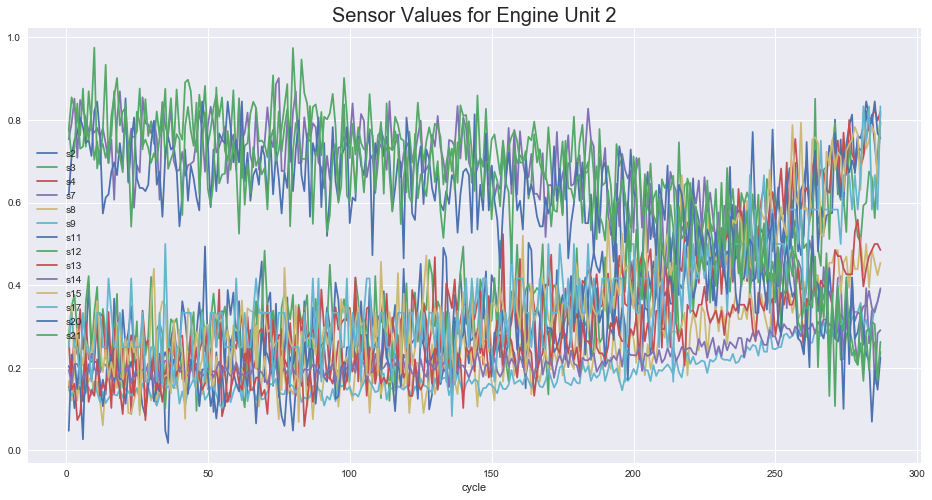

In [12]:
g = train_df[train_df.id==2].plot(x='cycle', y=sensor_columns_var, figsize=(16,8))
plt.title("Sensor Values for Engine Unit 2", fontsize=20)
savefig("sensor_all_plot")
plt.show()

### Pairplot

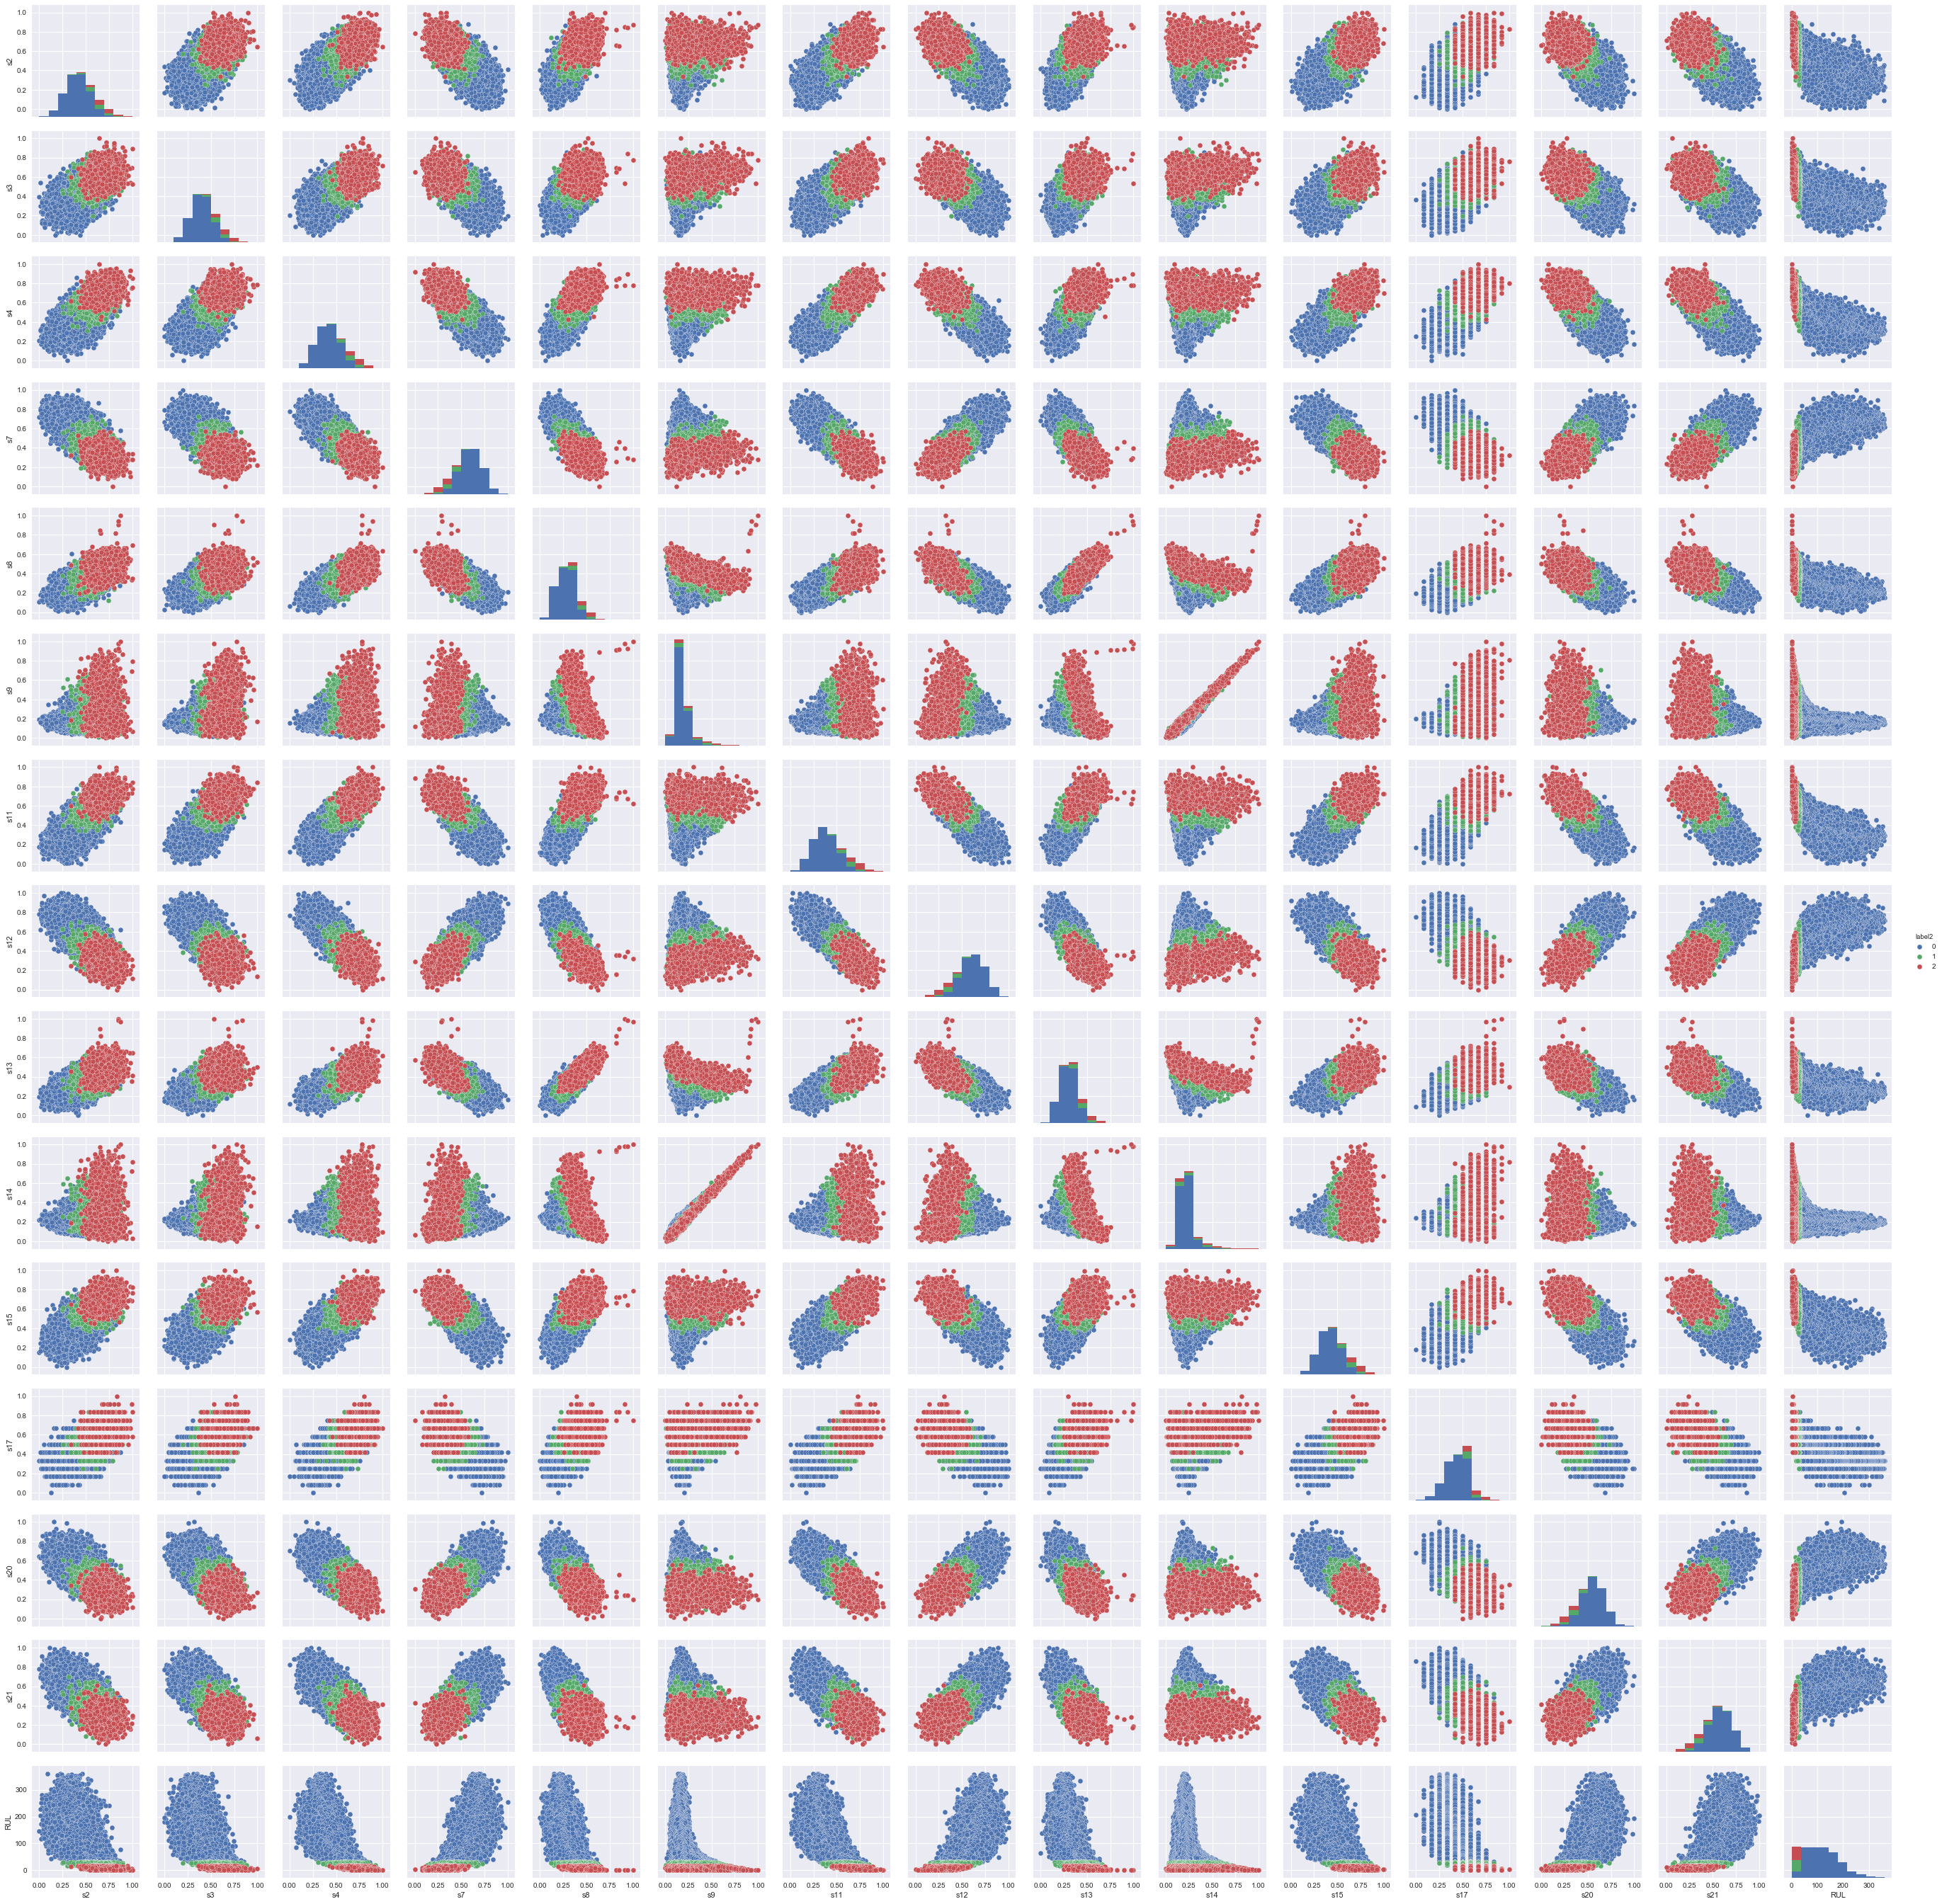

In [20]:
g = sns.pairplot(data=train_df, vars=sensor_columns_var + ['RUL'], hue='label2')
savefig('pairplot')

### Sensor Values Grouped By Label 1 Boxplot

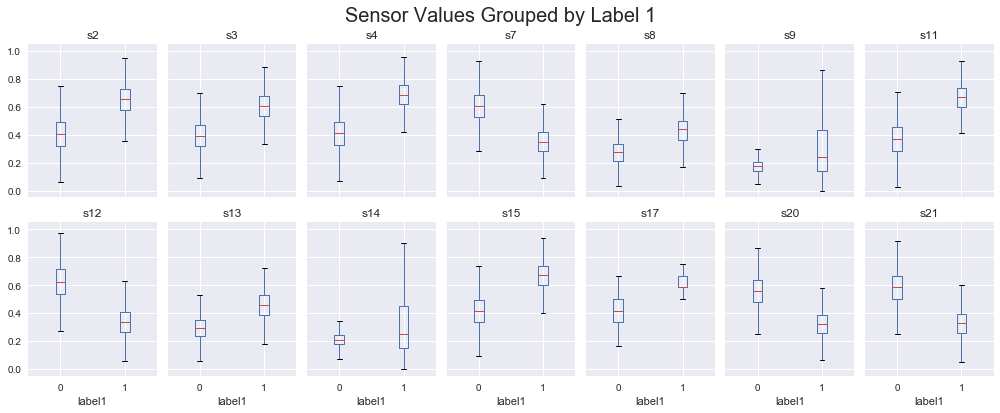

In [21]:
train_df.boxplot(sensor_columns_var, by='label1', figsize=(14,6), layout=(2,7))

plt.suptitle('Sensor Values Grouped by Label 1', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
savefig('label1boxplot')
plt.show()

### Sensor Values Grouped By Label 2 Boxplot

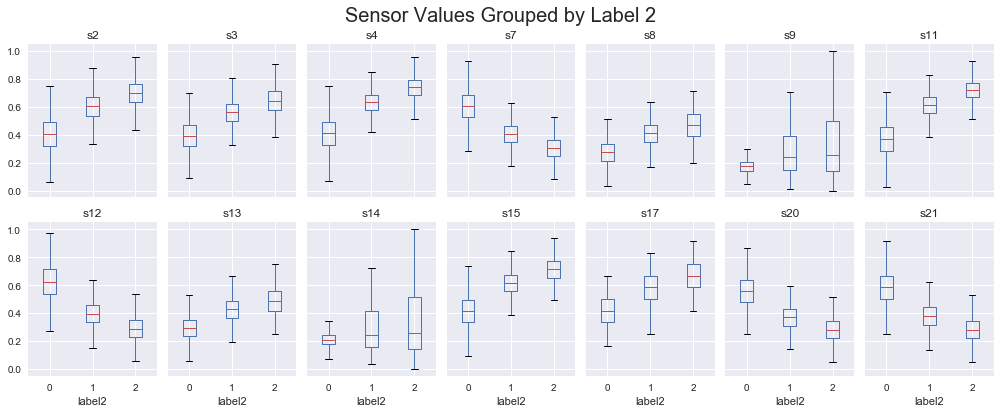

In [22]:
train_df.boxplot(sensor_columns_var, by='label2', figsize=(14,6), layout=(2,7))

plt.suptitle('Sensor Values Grouped by Label 2', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
savefig('label2boxplot')
plt.show()

# Aggregated Features

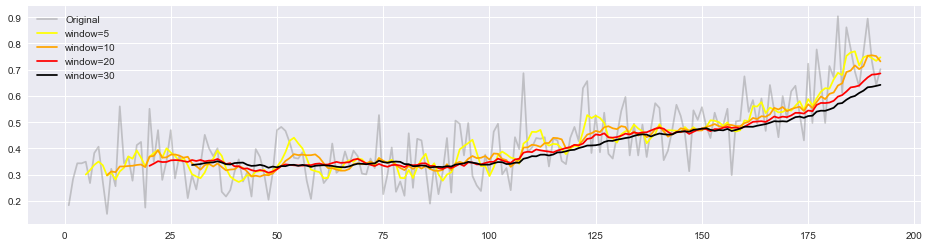

In [140]:
t = train_df[train_df.id==1]
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(t.cycle, t.s2, c='gray', alpha=0.4, label='Original')
ax.plot(t.cycle, t.s2.rolling(window=5).mean(), c='yellow', alpha=1, label='window=5')
ax.plot(t.cycle, t.s2.rolling(window=10).mean(), c='orange', alpha=1, label='window=10')
ax.plot(t.cycle, t.s2.rolling(window=20).mean(), c='red', alpha=1, label='window=20')
ax.plot(t.cycle, t.s2.rolling(window=30).mean(), c='black', alpha=1, label='window=30')
plt.legend()
savefig('rolling')

In [133]:
rolling_mean_columns = [c.replace('s', 'mean') for c in sensor_columns_var]
rolling_std_columns = [c.replace('s', 'std') for c in sensor_columns_var]
agg_cols = rolling_mean_columns + rolling_std_columns

In [134]:
def create_aggregate_features(df, window=10):
    res = pd.DataFrame(columns=df.columns)
    
    for unit_id, group in df.groupby('id'):
        group[rolling_mean_columns] = group[sensor_columns_var].rolling(window=window).mean()
        group[rolling_std_columns] = group[sensor_columns_var].rolling(window=window).std()
        group.fillna(method='bfill', axis=0, inplace=True)
        
        res = pd.concat([res,group])
        
    return res

In [135]:
train_df = create_aggregate_features(train_df)
test_df = create_aggregate_features(test_df)

display(train_df[agg_cols].head())
display(test_df[agg_cols].head())

mean2     mean3     mean4     mean7     mean8     mean9   mean11  \
0  0.298494  0.363462  0.313808  0.683736  0.225758  0.124877  0.25119   
1  0.298494  0.363462  0.313808  0.683736  0.225758  0.124877  0.25119   
2  0.298494  0.363462  0.313808  0.683736  0.225758  0.124877  0.25119   
3  0.298494  0.363462  0.313808  0.683736  0.225758  0.124877  0.25119   
4  0.298494  0.363462  0.313808  0.683736  0.225758  0.124877  0.25119   

     mean12    mean13    mean14   ...         std8      std9     std11  \
0  0.736887  0.241176  0.166622   ...     0.048152  0.024426  0.085837   
1  0.736887  0.241176  0.166622   ...     0.048152  0.024426  0.085837   
2  0.736887  0.241176  0.166622   ...     0.048152  0.024426  0.085837   
3  0.736887  0.241176  0.166622   ...     0.048152  0.024426  0.085837   
4  0.736887  0.241176  0.166622   ...     0.048152  0.024426  0.085837   

     std12     std13     std14     std15     std17    std20    std21  
0  0.08549  0.029575  0.017205  0.087166  0.076578  0.05435  0.06194  
1  0.08549  0.029575  0.017205  0.087166  0.076578  0.05435  0.06194  
2  0.08549  0.029575  0.017205  0.087166  0.076578  0.05435  0.06194  
3  0.08549  0.029575  0.017205  0.087166  0.076578  0.05435  0.06194  
4  0.08549  0.029575  0.017205  0.087166  0.076578  0.05435  0.06194  

[5 rows x 28 columns]

mean2     mean3     mean4     mean7    mean8     mean9    mean11  \
0  0.323795  0.312797  0.325101  0.693398  0.20303  0.130037  0.272619   
1  0.323795  0.312797  0.325101  0.693398  0.20303  0.130037  0.272619   
2  0.323795  0.312797  0.325101  0.693398  0.20303  0.130037  0.272619   
3  0.323795  0.312797  0.325101  0.693398  0.20303  0.130037  0.272619   
4  0.323795  0.312797  0.325101  0.693398  0.20303  0.130037  0.272619   

     mean12    mean13    mean14    ...         std8      std9     std11  \
0  0.693603  0.251471  0.162504    ...     0.031297  0.017171  0.071583   
1  0.693603  0.251471  0.162504    ...     0.031297  0.017171  0.071583   
2  0.693603  0.251471  0.162504    ...     0.031297  0.017171  0.071583   
3  0.693603  0.251471  0.162504    ...     0.031297  0.017171  0.071583   
4  0.693603  0.251471  0.162504    ...     0.031297  0.017171  0.071583   

      std12     std13     std14     std15     std17     std20     std21  
0  0.049995  0.024461  0.023214  0.078561  0.088279  0.072724  0.050545  
1  0.049995  0.024461  0.023214  0.078561  0.088279  0.072724  0.050545  
2  0.049995  0.024461  0.023214  0.078561  0.088279  0.072724  0.050545  
3  0.049995  0.024461  0.023214  0.078561  0.088279  0.072724  0.050545  
4  0.049995  0.024461  0.023214  0.078561  0.088279  0.072724  0.050545  

[5 rows x 28 columns]

# Maximum RUL

### Plot of Sensor Values and RUL against cycles

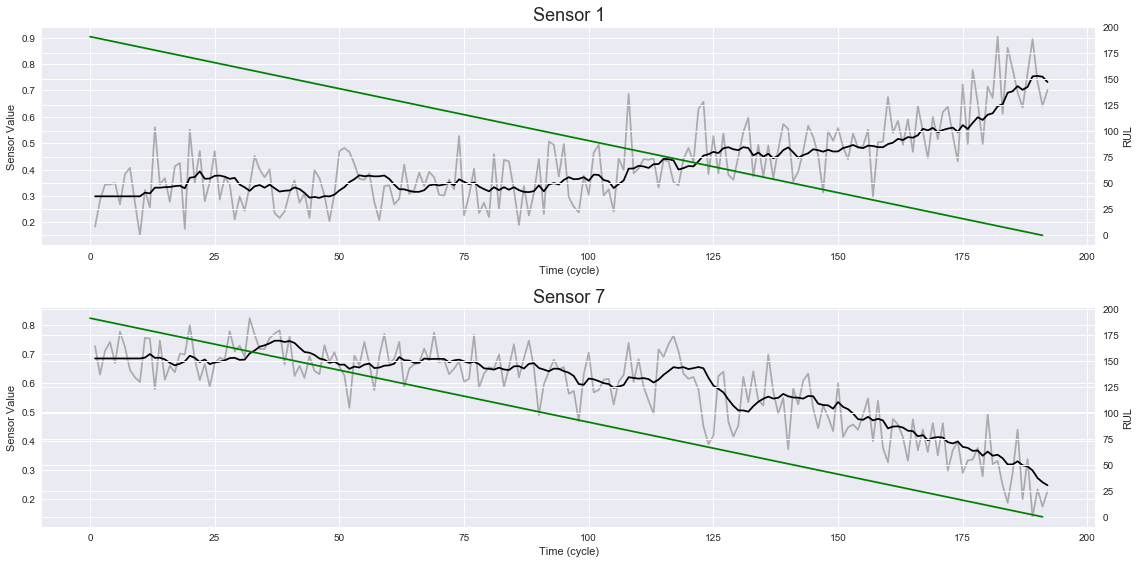

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))
plt_df = train_df[train_df.id==1]

ax1.plot(plt_df.cycle, plt_df.s2, alpha=0.6, color='grey')
ax1.plot(plt_df.cycle, plt_df.mean2, color='black')
ax1.set_xlabel('Time (cycle)')
ax1.set_ylabel('Sensor Value')
ax1.set_title('Sensor 1', fontsize=18)
ax12 = ax1.twinx()
ax12.plot(plt_df.RUL, color='green')
ax12.set_ylabel('RUL')

ax2.plot(plt_df.cycle, plt_df.s7, alpha=0.6, color='grey')
ax2.plot(plt_df.cycle, plt_df.mean7, color='black')
ax2.set_xlabel('Time (cycle)')
ax2.set_ylabel('Sensor Value')
ax2.set_title('Sensor 7', fontsize=18)
ax22 = ax2.twinx()
ax22.plot(plt_df.RUL, color='green')
ax22.set_ylabel('RUL')

plt.tight_layout()
savefig('rul')
plt.show()

### Create Max RUL value of 85

In [137]:
max_rul = 85
train_df['RUL_max'] = np.where(train_df.RUL > max_rul, max_rul, train_df.RUL)
train_df['RUL_max_norm'] = MinMaxScaler().fit_transform(train_df['RUL_max'].reshape(-1,1))
display(train_df.head())

RUL  RUL_norm cycle id label1 label2   mean11    mean12    mean13  \
0  191  0.529086     1  1      0      0  0.25119  0.736887  0.241176   
1  190  0.526316     2  1      0      0  0.25119  0.736887  0.241176   
2  189  0.523546     3  1      0      0  0.25119  0.736887  0.241176   
3  188  0.520776     4  1      0      0  0.25119  0.736887  0.241176   
4  187  0.518006     5  1      0      0  0.25119  0.736887  0.241176   

     mean14      ...           std2    std20    std21      std3      std4  \
0  0.166622      ...       0.083115  0.05435  0.06194  0.087873  0.055933   
1  0.166622      ...       0.083115  0.05435  0.06194  0.087873  0.055933   
2  0.166622      ...       0.083115  0.05435  0.06194  0.087873  0.055933   
3  0.166622      ...       0.083115  0.05435  0.06194  0.087873  0.055933   
4  0.166622      ...       0.083115  0.05435  0.06194  0.087873  0.055933   

       std7      std8      std9  RUL_max  RUL_max_norm  
0  0.059318  0.048152  0.024426       85           1.0  
1  0.059318  0.048152  0.024426       85           1.0  
2  0.059318  0.048152  0.024426       85           1.0  
3  0.059318  0.048152  0.024426       85           1.0  
4  0.059318  0.048152  0.024426       85           1.0  

[5 rows x 50 columns]

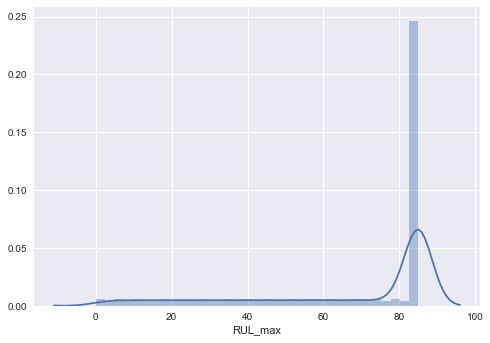

In [139]:
g = sns.distplot(train_df.RUL_max)
savefig('rulmaxdist')

### Plot of features and Max RUL against cycles

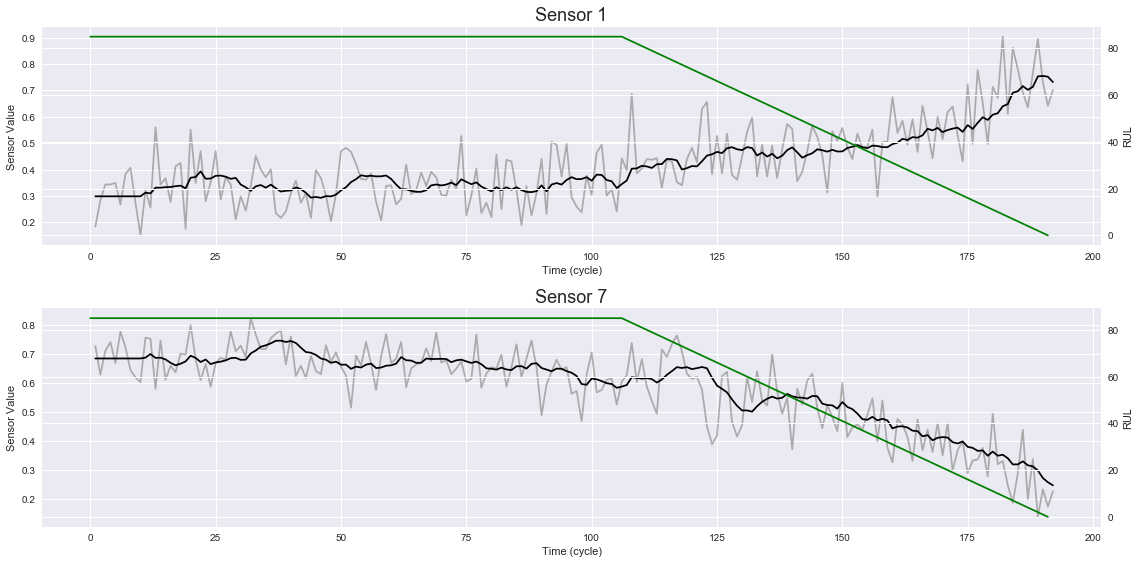

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))
plt_df = train_df[train_df.id==1]

ax1.plot(plt_df.cycle, plt_df.s2, alpha=0.6, color='grey')
ax1.plot(plt_df.cycle, plt_df.mean2, color='black')
ax1.set_xlabel('Time (cycle)')
ax1.set_ylabel('Sensor Value')
ax1.set_title('Sensor 1', fontsize=18)
ax12 = ax1.twinx()
ax12.plot(plt_df.RUL_max, color='green')
ax12.set_ylabel('RUL')

ax2.plot(plt_df.cycle, plt_df.s7, alpha=0.6, color='grey')
ax2.plot(plt_df.cycle, plt_df.mean7, color='black')
ax2.set_xlabel('Time (cycle)')
ax2.set_ylabel('Sensor Value')
ax2.set_title('Sensor 7', fontsize=18)
ax22 = ax2.twinx()
ax22.plot(plt_df.RUL_max, color='green')
ax22.set_ylabel('RUL')

plt.tight_layout()
savefig('rul_max')
plt.show()

### Plot of Test Set Features Against RUL

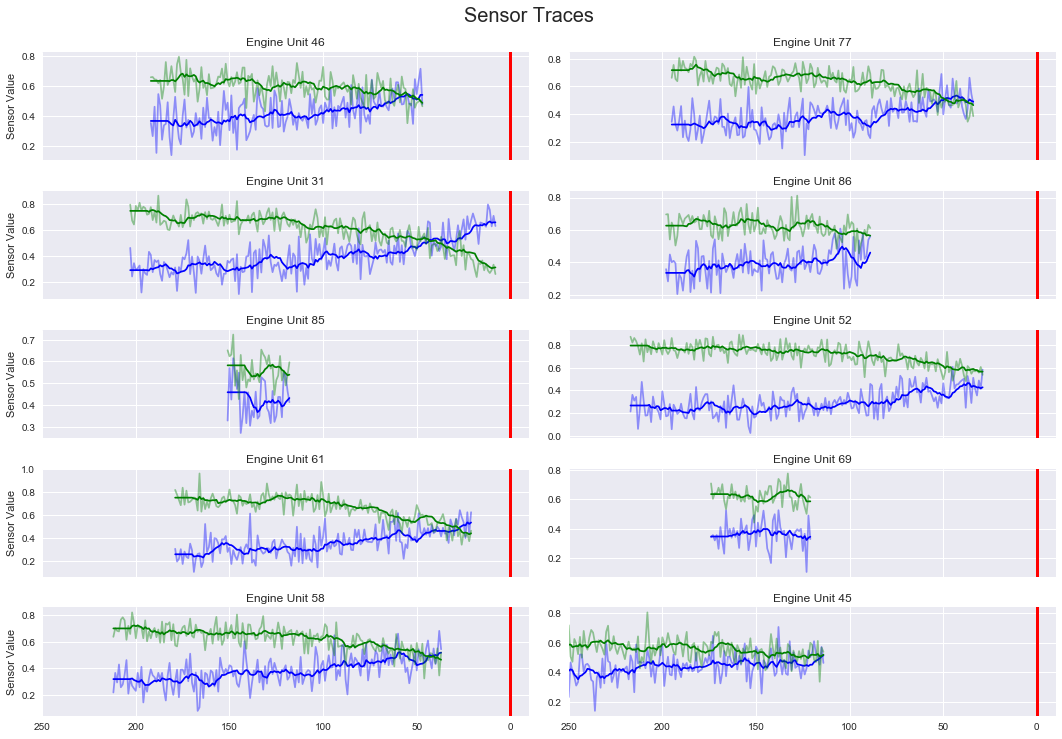

In [15]:
ids = train_df['id'].unique()
units_to_plot = np.random.choice(ids, size=10, replace=False)
plot_data = test_df[test_df.id.isin(units_to_plot)]
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)

for index, ax in enumerate(axes.ravel()):
    plt_df = plot_data[plot_data.id == units_to_plot[index]]
    ax.plot(plt_df.RUL, plt_df.s2, alpha=0.4, color='blue')
    ax.plot(plt_df.RUL, plt_df.mean2, color='blue')
    ax.plot(plt_df.RUL, plt_df.s7, alpha=0.4, color='green')
    ax.plot(plt_df.RUL, plt_df.mean7, color='green')
    ax.axvline(x=0, color='r', linewidth=3)
    ax.invert_xaxis()
    ax.axvline(x=0, color='r', linewidth=3)
    ax.set_xlim([250, -10])
    
    if index % 2 == 0: ax.set_ylabel("Sensor Value")
    ax.set_title("Engine Unit {}".format(units_to_plot[index]))

fig.suptitle("Sensor Traces", size=20, y=1.025)
fig.tight_layout()
savefig('rul_test')

### Histogram showing distrubution of Healthy vs Failing PCA features

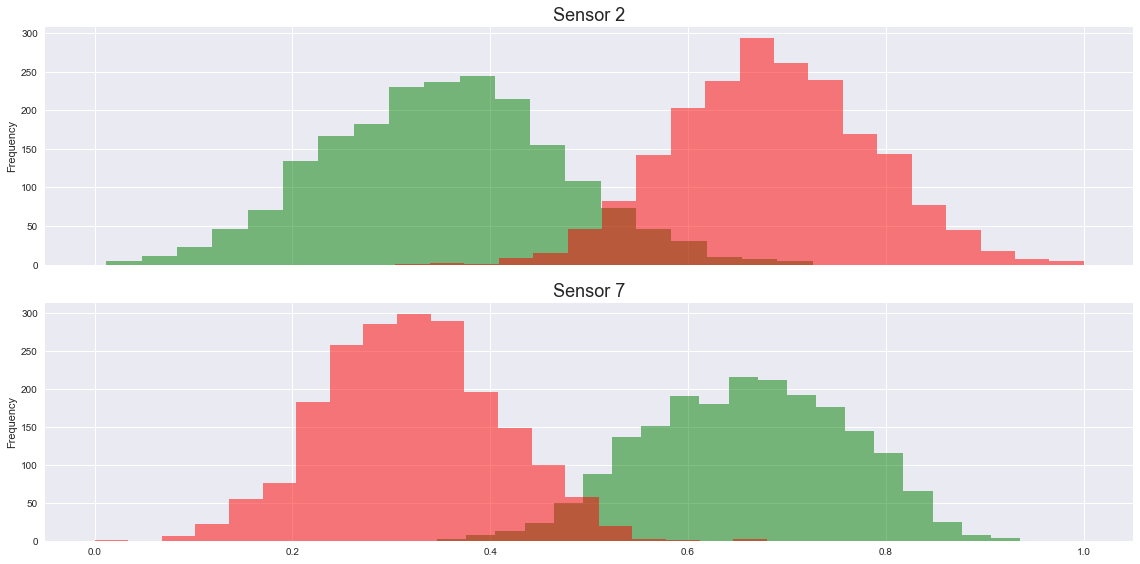

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)

train_df.groupby('id').head(20)['s2'].plot(kind='hist', bins=20, label='Healthy', color='green', alpha=0.5, ax=ax1)
train_df.groupby('id').tail(20)['s2'].plot(kind='hist', bins=20, label='Failing', color='red', alpha=0.5, ax=ax1)
ax1.set_title('Sensor 2', fontsize=18)
train_df.groupby('id').head(20)['s7'].plot(kind='hist', bins=20, label='Healthy', color='green', alpha=0.5, ax=ax2)
train_df.groupby('id').tail(20)['s7'].plot(kind='hist', bins=20, label='Failing', color='red', alpha=0.5, ax=ax2)
ax2.set_title('Sensor 7', fontsize=18)
plt.tight_layout()
savefig('dist')
plt.show()

In [40]:
t = test_df.groupby('id').last()

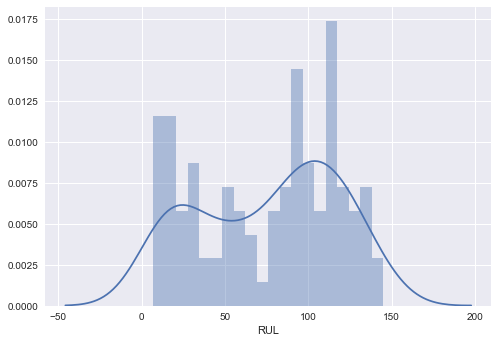

In [41]:
g = sns.distplot(t.RUL, bins=20)

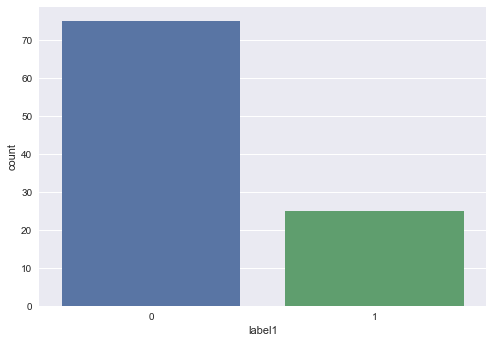

In [36]:
g = sns.countplot(t.label1)

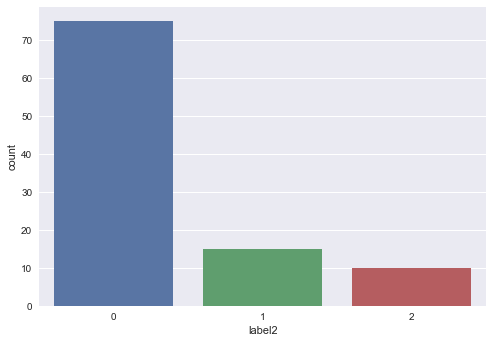

In [37]:
g = sns.countplot(t.label2)

In [64]:
pd.DataFrame(t.RUL.agg(['mean', 'median', 'min', 'max', 'skew', 'kurtosis']))

RUL
mean       75.520000
median     86.000000
min         7.000000
max       145.000000
skew       -0.232969
kurtosis   -1.288277

# Save Dataframes to CSV

In [42]:
train_df.to_csv('data/preprocessed/train_df.csv', index=False)
test_df.to_csv('data/preprocessed/test_df.csv', index=False)